# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
bivd = pd.crosstab(df["sex"], df["flag_doente"],margins=True)

### Quantidade média de doentes

In [5]:
bivd["mean_sick"] = bivd[1] / bivd["All"]

In [6]:
bivd

flag_doente,0,1,All,mean_sick
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


### Chance(odds)


In [7]:
bivd["odds"] = bivd[1] / bivd[0]

In [8]:
bivd

flag_doente,0,1,All,mean_sick,odds
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


### Odds ratio

In [9]:
bivd['OR_vs_male'] = bivd['odds']/bivd.loc[1,'odds']
bivd

flag_doente,0,1,All,mean_sick,odds,OR_vs_male
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.280214
1.0,92,114,206,0.553398,1.239130,1.000000
All,164,139,303,0.458746,0.847561,0.683997


### Log odds

In [10]:
bivd["Logito"] = np.log(bivd["odds"])

In [11]:
bivd

flag_doente,0,1,All,mean_sick,odds,OR_vs_male,Logito
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.280214,-1.057790
1.0,92,114,206,0.553398,1.239130,1.000000,0.214410
All,164,139,303,0.458746,0.847561,0.683997,-0.165392


### Weight of Evidence (WOE)

In [12]:
bivd["WOE"] = np.log(bivd["OR_vs_male"])

In [13]:
bivd

flag_doente,0,1,All,mean_sick,odds,OR_vs_male,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.280214,-1.057790,-1.272200
1.0,92,114,206,0.553398,1.239130,1.000000,0.214410,0.000000
All,164,139,303,0.458746,0.847561,0.683997,-0.165392,-0.379802


# Exercicio 2

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

### Categorizando 'age'
- Menor que 13 = criança 
- Entre 14 e 20 = jovem
- Entre 21 e 40 = adulto
- Entre 41 e 65 = meia idade
- Maior que 66 = idoso


In [14]:
df.loc[df["age"].between(0,13), "cat_age"] = 'kid'
df.loc[df["age"].between(14,20), "cat_age"] = 'yong'
df.loc[df["age"].between(21,40), "cat_age"] = 'adult'
df.loc[df["age"].between(41,65), "cat_age"] = "middle aged adult"
df.loc[df["age"] >= 65, "cat_age"] = "elderly"

C:\Users\sarme\AppData\Local\Temp\ipykernel_16028\3575140236.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'kid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["age"].between(0,13), "cat_age"] = 'kid'


In [15]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,cat_age
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,middle aged adult
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,elderly
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,elderly
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,adult
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,middle aged adult
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0,middle aged adult
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3,1,middle aged adult
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0,middle aged adult
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2,1,middle aged adult
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1,1,middle aged adult


In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,cat_age
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,middle aged adult
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,elderly
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,elderly
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,adult
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,middle aged adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,middle aged adult
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,elderly
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,middle aged adult
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,middle aged adult


In [17]:
biv_age = pd.crosstab(df["cat_age"], df["flag_doente"], margins=True)

In [18]:
biv_age

flag_doente,0,1,All
cat_age,,,
adult,12,6,18
elderly,21,20,41
middle aged adult,131,113,244
All,164,139,303


In [19]:
biv_age["mean_sick"] = biv_age[1] / biv_age["All"]

In [20]:
biv_age

flag_doente,0,1,All,mean_sick
cat_age,,,,
adult,12,6,18,0.333333
elderly,21,20,41,0.487805
middle aged adult,131,113,244,0.463115
All,164,139,303,0.458746


### Chance(odds)

In [21]:
biv_age["odds"] = biv_age[1] / biv_age[0]

In [22]:
biv_age

flag_doente,0,1,All,mean_sick,odds
cat_age,,,,,
adult,12,6,18,0.333333,0.500000
elderly,21,20,41,0.487805,0.952381
middle aged adult,131,113,244,0.463115,0.862595
All,164,139,303,0.458746,0.847561


### Odds Ratio

In [23]:
biv_age['OR_vs_middle aged adult'] = biv_age['odds'] / biv_age.loc["middle aged adult",'odds']
biv_age

flag_doente,0,1,All,mean_sick,odds,OR_vs_middle aged adult
cat_age,,,,,,
adult,12,6,18,0.333333,0.500000,0.579646
elderly,21,20,41,0.487805,0.952381,1.104088
middle aged adult,131,113,244,0.463115,0.862595,1.000000
All,164,139,303,0.458746,0.847561,0.982571


### Logito (Log odds)

In [24]:
biv_age["logito"] = np.log(biv_age["odds"])

In [25]:
biv_age

flag_doente,0,1,All,mean_sick,odds,OR_vs_middle aged adult,logito
cat_age,,,,,,,
adult,12,6,18,0.333333,0.500000,0.579646,-0.693147
elderly,21,20,41,0.487805,0.952381,1.104088,-0.048790
middle aged adult,131,113,244,0.463115,0.862595,1.000000,-0.147810
All,164,139,303,0.458746,0.847561,0.982571,-0.165392


### Weight of Evidence (WOE)

In [26]:
biv_age["WOE"] = np.log(biv_age["OR_vs_middle aged adult"])

In [27]:
biv_age

flag_doente,0,1,All,mean_sick,odds,OR_vs_middle aged adult,logito,WOE
cat_age,,,,,,,,
adult,12,6,18,0.333333,0.500000,0.579646,-0.693147,-0.545338
elderly,21,20,41,0.487805,0.952381,1.104088,-0.048790,0.099019
middle aged adult,131,113,244,0.463115,0.862595,1.000000,-0.147810,0.000000
All,164,139,303,0.458746,0.847561,0.982571,-0.165392,-0.017583


### Calcule também o valor médio da variável age

In [28]:
df.groupby('flag_doente')['age'].mean()

flag_doente
0    52.585366
1    56.625899
Name: age, dtype: float64

In [29]:
biv_age.reset_index(inplace=True)

In [30]:
biv_age

flag_doente,cat_age,0,1,All,mean_sick,odds,OR_vs_middle aged adult,logito,WOE
0,adult,12,6,18,0.333333,0.500000,0.579646,-0.693147,-0.545338
1,elderly,21,20,41,0.487805,0.952381,1.104088,-0.048790,0.099019
2,middle aged adult,131,113,244,0.463115,0.862595,1.000000,-0.147810,0.000000
3,All,164,139,303,0.458746,0.847561,0.982571,-0.165392,-0.017583


# Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

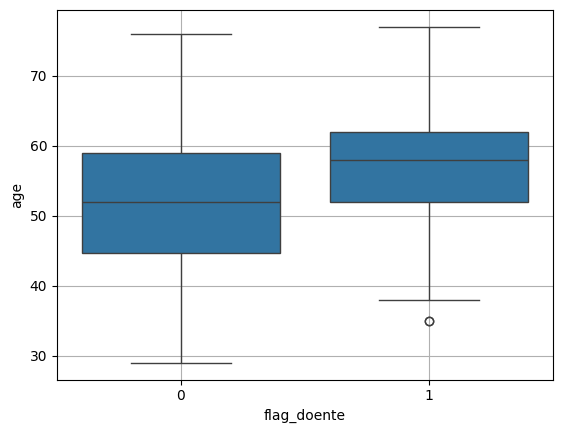

In [31]:
fig, axes = plt.subplots()

sns.boxplot(data=df, x="flag_doente", y="age")
plt.grid()

<Axes: xlabel='cat_age', ylabel='WOE'>

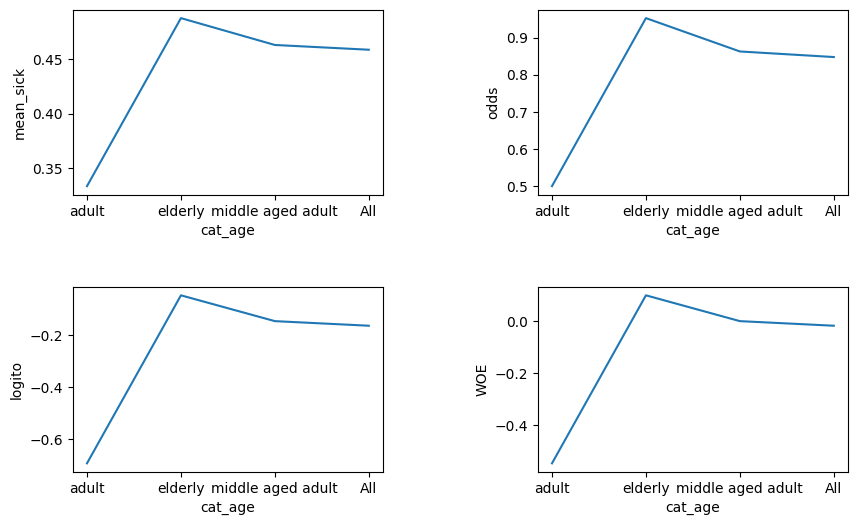

In [48]:
fig, axes = plt.subplots(2,2, figsize=[10,6])
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.lineplot(ax=axes[0,0], data=biv_age, x="cat_age",y="mean_sick")
sns.lineplot(ax=axes[0,1], data=biv_age, x="cat_age",y="odds")
sns.lineplot(ax=axes[1,0], data=biv_age, x="cat_age",y="logito")
sns.lineplot(ax=axes[1,1], data=biv_age, x="cat_age",y="WOE")